In [4]:
%load_ext autoreload
%autoreload 2
# this only works on startup!
from jax import config
config.update("jax_enable_x64", True)

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '2'
from gpu_utils import limit_gpu_memory_growth
limit_gpu_memory_growth()

from cleanplots import *
from tqdm import tqdm
from information_estimation import *
from image_utils import *

from led_array.bsccm_utils import *
from bsccm import BSCCM
from jax import jit
import numpy as onp
import jax.numpy as np

bsccm = BSCCM('/home/hpinkard_waller/data/BSCCM/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Opening BSCCM
Opened BSCCM


In [3]:
channel_names = ['Brightfield', 'DPC_Right', 'LED119' ]
edge_crop = 32
num_images = 5000
num_patches = 5000
photons_per_pixel = []
num_bootstrap_samples = 10
confidence_interval = 99
patch_size = 10

mi_means = []
mi_confidences = []
h_y_given_x_means = []
h_y_given_x_confidences = []
for channel_name in tqdm(channel_names):
    images = load_bsccm_images(bsccm, channel_name, num_images=num_images, edge_crop=edge_crop, convert_units_to_photons=True, median_filter=True, verbose=False)
    patches = extract_patches(images, patch_size=patch_size, num_patches=num_patches, verbose=False)
    patches = patches * photons_per_pixel / np.mean(images)
    noisy_patches = add_noise(patches)

    mi_mean, mi_confidence = run_bootstrap(noisy_patches, num_bootstrap_samples=num_bootstrap_samples, confidence_interval=confidence_interval, 
                estimation_fn=lambda noisy_images: estimate_mutual_information(noisy_images=noisy_images, verbose=True))
    
    h_y_given_x_mean, h_y_given_x_confidence = run_bootstrap(noisy_patches, num_bootstrap_samples=num_bootstrap_samples, confidence_interval=confidence_interval,
                estimation_fn=lambda noisy_images: estimate_conditional_entropy(patches))

    mi_means.append(mi_mean)
    mi_confidences.append(mi_confidence)
    h_y_given_x_means.append(h_y_given_x_mean)
    h_y_given_x_confidences.append(h_y_given_x_confidence)
    
mi_means = np.array(mi_means)
mi_confidences = np.array(mi_confidences)
h_y_given_x_means = np.array(h_y_given_x_means)
h_y_given_x_confidences = np.array(h_y_given_x_confidences)

  0%|          | 0/3 [00:00<?, ?it/s]

building toeplitz mat: 100%|██████████| 19/19 [00:00<00:00, 31.64it/s]


Estimated H(Y|X) = 6.153 bits/pixel
Estimated H(Y) = 6.236 bits/pixel
Estimated I(Y;X) = 0.083 bits/pixel
Estimated H(Y|X) = 6.152 bits/pixel
Estimated H(Y) = 6.241 bits/pixel
Estimated I(Y;X) = 0.088 bits/pixel
Estimated H(Y|X) = 6.152 bits/pixel
Estimated H(Y) = 6.237 bits/pixel
Estimated I(Y;X) = 0.085 bits/pixel
Estimated H(Y|X) = 6.152 bits/pixel
Estimated H(Y) = 6.234 bits/pixel
Estimated I(Y;X) = 0.082 bits/pixel
Estimated H(Y|X) = 6.152 bits/pixel
Estimated H(Y) = 6.235 bits/pixel
Estimated I(Y;X) = 0.083 bits/pixel
Estimated H(Y|X) = 6.152 bits/pixel
Estimated H(Y) = 6.237 bits/pixel
Estimated I(Y;X) = 0.085 bits/pixel
Estimated H(Y|X) = 6.152 bits/pixel
Estimated H(Y) = 6.234 bits/pixel
Estimated I(Y;X) = 0.081 bits/pixel
Estimated H(Y|X) = 6.152 bits/pixel
Estimated H(Y) = 6.234 bits/pixel
Estimated I(Y;X) = 0.083 bits/pixel
Estimated H(Y|X) = 6.152 bits/pixel
Estimated H(Y) = 6.235 bits/pixel
Estimated I(Y;X) = 0.082 bits/pixel
Estimated H(Y|X) = 6.153 bits/pixel
Estimated 

 33%|███▎      | 1/3 [01:02<02:05, 62.97s/it]

Estimated H(Y|X) = 6.135 bits/pixel
Estimated H(Y) = 6.462 bits/pixel
Estimated I(Y;X) = 0.327 bits/pixel
Estimated H(Y|X) = 6.133 bits/pixel
Estimated H(Y) = 6.460 bits/pixel
Estimated I(Y;X) = 0.328 bits/pixel
Estimated H(Y|X) = 6.135 bits/pixel
Estimated H(Y) = 6.464 bits/pixel
Estimated I(Y;X) = 0.329 bits/pixel
Estimated H(Y|X) = 6.131 bits/pixel
Estimated H(Y) = 6.447 bits/pixel
Estimated I(Y;X) = 0.316 bits/pixel
Estimated H(Y|X) = 6.135 bits/pixel
Estimated H(Y) = 6.457 bits/pixel
Estimated I(Y;X) = 0.322 bits/pixel
Estimated H(Y|X) = 6.135 bits/pixel
Estimated H(Y) = 6.458 bits/pixel
Estimated I(Y;X) = 0.322 bits/pixel
Estimated H(Y|X) = 6.133 bits/pixel
Estimated H(Y) = 6.444 bits/pixel
Estimated I(Y;X) = 0.311 bits/pixel


 67%|██████▋   | 2/3 [01:55<00:57, 57.10s/it]

Estimated H(Y|X) = 6.131 bits/pixel
Estimated H(Y) = 6.463 bits/pixel
Estimated I(Y;X) = 0.332 bits/pixel
Estimated H(Y|X) = 6.133 bits/pixel
Estimated H(Y) = 6.466 bits/pixel
Estimated I(Y;X) = 0.333 bits/pixel
Estimated H(Y|X) = 6.133 bits/pixel
Estimated H(Y) = 6.446 bits/pixel
Estimated I(Y;X) = 0.313 bits/pixel
Estimated H(Y|X) = 6.095 bits/pixel
Estimated H(Y) = 6.714 bits/pixel
Estimated I(Y;X) = 0.618 bits/pixel
Estimated H(Y|X) = 6.099 bits/pixel
Estimated H(Y) = 6.743 bits/pixel
Estimated I(Y;X) = 0.644 bits/pixel
Estimated H(Y|X) = 6.102 bits/pixel
Estimated H(Y) = 6.738 bits/pixel
Estimated I(Y;X) = 0.635 bits/pixel
Estimated H(Y|X) = 6.096 bits/pixel
Estimated H(Y) = 6.736 bits/pixel
Estimated I(Y;X) = 0.640 bits/pixel
Estimated H(Y|X) = 6.098 bits/pixel
Estimated H(Y) = 6.753 bits/pixel
Estimated I(Y;X) = 0.655 bits/pixel
Estimated H(Y|X) = 6.098 bits/pixel
Estimated H(Y) = 6.754 bits/pixel
Estimated I(Y;X) = 0.656 bits/pixel
Estimated H(Y|X) = 6.100 bits/pixel
Estimated 

100%|██████████| 3/3 [02:48<00:00, 56.13s/it]


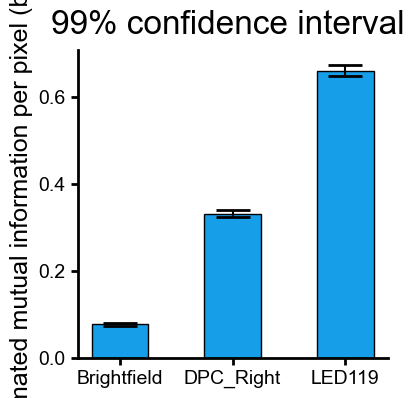

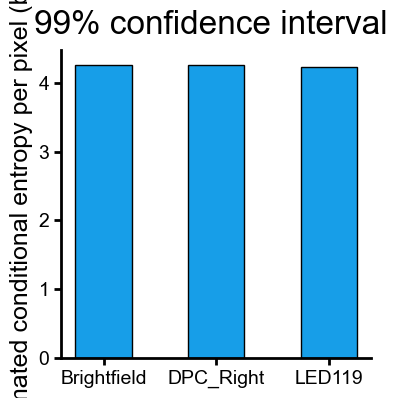

In [15]:
# set the width of the bars
bar_width = 0.35
error_kw = {'capsize': 12, 'capthick': 2}

# create a paired bar plot of results
fig, ax = plt.subplots(1, 1, figsize=(4, 4))


# create the bar plots
bar_width = 0.5
lower_errors = mi_means - mi_confidences[:, 0]
upper_errors = mi_confidences[:, 1] - mi_means

# Calculate the positions where the bars should be placed to be centered on the ticks
positions = np.arange(len(channel_names)) + 0.5 * bar_width

ax.bar(
    positions,
    mi_means,
    yerr=np.array([lower_errors, upper_errors]),
    width=bar_width,
    color=colors[0],
    edgecolor='k',
    linewidth=1,
    error_kw=error_kw
)

# add labels, title, and legend
ax.set_xticks(np.arange(len(channel_names)) + bar_width / 2, channel_names)
ax.set_ylabel('Estimated mutual information per pixel (bits)')
fig.suptitle(f'{confidence_interval}% confidence interval')
clear_spines(ax)

# make another plot for conditional entropy
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

lower_errors = h_y_given_x_means - h_y_given_x_confidences[:, 0]
upper_errors = h_y_given_x_confidences[:, 1] - h_y_given_x_means

ax.bar(
    positions,
    h_y_given_x_means,
    # yerr=np.array([lower_errors, upper_errors]),
    width=bar_width,
    color=colors[0],
    edgecolor='k',
    linewidth=1,
    error_kw=error_kw
)

# add labels, title, and legend
ax.set_xticks(np.arange(len(channel_names)) + bar_width / 2, channel_names)
ax.set_ylabel('Estimated conditional entropy per pixel (bits)')
fig.suptitle(f'{confidence_interval}% confidence interval')
clear_spines(ax)

## MI vs num photons

In [15]:
channel_names = ['Brightfield', 'DPC_Right', 'LED119' ]
edge_crop = 32
num_images = 5000
num_patches = 5000
photons_per_pixel = [20, 40, 80, 160, 300]
num_bootstrap_samples = 10
confidence_interval = 99
patch_size = 20

mi_means_by_channel_photons = {}
mi_confidences_by_channel_photons = {}
for channel_name in tqdm(channel_names):
    mi_means_by_channel_photons[channel_name] = []
    mi_confidences_by_channel_photons[channel_name] = []
    images = load_bsccm_images(bsccm, channel_name, num_images=num_images, edge_crop=edge_crop, convert_units_to_photons=True, median_filter=False, verbose=False)
    for num_photons in photons_per_pixel:
        patches = extract_patches(images, patch_size=patch_size, num_patches=num_patches, verbose=False)
        noisy_patches = add_shot_noise_to_experimenal_data(patches, num_photons / np.mean(images))

        mi_mean, mi_confidence = run_bootstrap(noisy_patches, num_bootstrap_samples=num_bootstrap_samples, confidence_interval=confidence_interval, 
                    estimation_fn=lambda noisy_images: estimate_mutual_information(noisy_images=noisy_images, verbose=True, use_iterative_optimization=True))
        mi_means_by_channel_photons[channel_name].append(mi_mean)
        mi_confidences_by_channel_photons[channel_name].append(mi_confidence)
    
mi_means_by_channel_photons = {channel: np.array(v) for channel, v in mi_means_by_channel_photons.items()}
mi_confidences_by_channel_photons = {channel: np.array(v) for channel, v in mi_confidences_by_channel_photons.items()}

  0%|          | 0/3 [00:00<?, ?it/s]

/home/hpinkard_waller/GitRepos/EncodingInformation/information_estimation.py:250: UserWarning: Mean pixel value is 19.74. More accurate results can probably be obtainedby setting estimate_conditional_from_model_samples=True
  warnings.warn(f"Mean pixel value is {np.mean(clean_images_if_available):.2f}. More accurate results can probably be obtained"


Initial loss:  2.929697557674424


/home/hpinkard_waller/GitRepos/EncodingInformation/gaussian_process_utils.py:531: UserWarning: Optimization did not improve the validation loss, returning initial covariance matrix
  cov_mat_optimized = cov_mat_initial
/home/hpinkard_waller/GitRepos/EncodingInformation/information_estimation.py:250: UserWarning: Mean pixel value is 19.75. More accurate results can probably be obtainedby setting estimate_conditional_from_model_samples=True
  warnings.warn(f"Mean pixel value is {np.mean(clean_images_if_available):.2f}. More accurate results can probably be obtained"


\Optimized loss:  2.929697811218924
Estimated H(Y|X) = 4.178 bits/pixel
Estimated H(Y) = 4.213 bits/pixel
Estimated I(Y;X) = 0.035 bits/pixel
Initial loss:  2.9235734311506394
\Optimized loss:  2.92357344034384635783370705057
Estimated H(Y|X) = 4.178 bits/pixel
Estimated H(Y) = 4.214 bits/pixel
Estimated I(Y;X) = 0.036 bits/pixel


/home/hpinkard_waller/GitRepos/EncodingInformation/information_estimation.py:250: UserWarning: Mean pixel value is 19.76. More accurate results can probably be obtainedby setting estimate_conditional_from_model_samples=True
  warnings.warn(f"Mean pixel value is {np.mean(clean_images_if_available):.2f}. More accurate results can probably be obtained"


Initial loss:  2.921582887802436
\Optimized loss:  2.92158160093059135844065623076
Estimated H(Y|X) = 4.178 bits/pixel
Estimated H(Y) = 4.214 bits/pixel
Estimated I(Y;X) = 0.036 bits/pixel
Initial loss:  2.9288121874668063
\Optimized loss:  2.92880867694566688118307400175
Estimated H(Y|X) = 4.178 bits/pixel
Estimated H(Y) = 4.214 bits/pixel
Estimated I(Y;X) = 0.036 bits/pixel
Initial loss:  2.9227945407951506
\Optimized loss:  2.92279477502637257983559312873
Estimated H(Y|X) = 4.178 bits/pixel
Estimated H(Y) = 4.215 bits/pixel
Estimated I(Y;X) = 0.037 bits/pixel
Initial loss:  2.9273241551292517
\Optimized loss:  2.927306266884117773077447229965
Estimated H(Y|X) = 4.178 bits/pixel
Estimated H(Y) = 4.214 bits/pixel
Estimated I(Y;X) = 0.036 bits/pixel


/home/hpinkard_waller/GitRepos/EncodingInformation/information_estimation.py:250: UserWarning: Mean pixel value is 19.73. More accurate results can probably be obtainedby setting estimate_conditional_from_model_samples=True
  warnings.warn(f"Mean pixel value is {np.mean(clean_images_if_available):.2f}. More accurate results can probably be obtained"


Initial loss:  2.9264527353719187
\Optimized loss:  2.92645300474870454621298433724
Estimated H(Y|X) = 4.177 bits/pixel
Estimated H(Y) = 4.212 bits/pixel
Estimated I(Y;X) = 0.035 bits/pixel
Initial loss:  2.9202718756813857
\Optimized loss:  2.92027059175864402721693477317
Estimated H(Y|X) = 4.178 bits/pixel
Estimated H(Y) = 4.212 bits/pixel
Estimated I(Y;X) = 0.035 bits/pixel
Initial loss:  2.9239916970997224
\Optimized loss:  2.92398884978113939934974263964
Estimated H(Y|X) = 4.178 bits/pixel
Estimated H(Y) = 4.214 bits/pixel
Estimated I(Y;X) = 0.036 bits/pixel
Initial loss:  2.9173472229642035
\Optimized loss:  2.917337293759241773375372713344
Estimated H(Y|X) = 4.178 bits/pixel
Estimated H(Y) = 4.214 bits/pixel
Estimated I(Y;X) = 0.036 bits/pixel
Initial loss:  3.274425166013541
\Optimized loss:  3.27442246438097844230000462734
Estimated H(Y|X) = 4.688 bits/pixel
Estimated H(Y) = 4.724 bits/pixel
Estimated I(Y;X) = 0.036 bits/pixel
Initial loss:  3.2727395618353996
\Optimized loss:

 33%|███▎      | 1/3 [1:06:08<2:12:17, 3968.67s/it]

Estimated H(Y|X) = 6.151 bits/pixel
Estimated H(Y) = 6.252 bits/pixel
Estimated I(Y;X) = 0.101 bits/pixel
Initial loss:  2.97233578246024
\Optimized loss:  2.97233315758019463337924043363
Estimated H(Y|X) = 4.161 bits/pixel
Estimated H(Y) = 4.289 bits/pixel
Estimated I(Y;X) = 0.128 bits/pixel


/home/hpinkard_waller/GitRepos/EncodingInformation/information_estimation.py:250: UserWarning: Mean pixel value is 19.69. More accurate results can probably be obtainedby setting estimate_conditional_from_model_samples=True
  warnings.warn(f"Mean pixel value is {np.mean(clean_images_if_available):.2f}. More accurate results can probably be obtained"


Initial loss:  2.9710927762386063
\Optimized loss:  2.97109064230238570954001024073
Estimated H(Y|X) = 4.160 bits/pixel
Estimated H(Y) = 4.289 bits/pixel
Estimated I(Y;X) = 0.129 bits/pixel


/home/hpinkard_waller/GitRepos/EncodingInformation/information_estimation.py:250: UserWarning: Mean pixel value is 19.64. More accurate results can probably be obtainedby setting estimate_conditional_from_model_samples=True
  warnings.warn(f"Mean pixel value is {np.mean(clean_images_if_available):.2f}. More accurate results can probably be obtained"


Initial loss:  2.9616331584361277
\Optimized loss:  2.96163298749446566434066476757
Estimated H(Y|X) = 4.158 bits/pixel
Estimated H(Y) = 4.288 bits/pixel
Estimated I(Y;X) = 0.130 bits/pixel


/home/hpinkard_waller/GitRepos/EncodingInformation/information_estimation.py:250: UserWarning: Mean pixel value is 19.66. More accurate results can probably be obtainedby setting estimate_conditional_from_model_samples=True
  warnings.warn(f"Mean pixel value is {np.mean(clean_images_if_available):.2f}. More accurate results can probably be obtained"


Initial loss:  2.969650601120228
\Optimized loss:  2.96963463404394156347088942905
Estimated H(Y|X) = 4.159 bits/pixel
Estimated H(Y) = 4.288 bits/pixel
Estimated I(Y;X) = 0.130 bits/pixel


/home/hpinkard_waller/GitRepos/EncodingInformation/information_estimation.py:250: UserWarning: Mean pixel value is 19.71. More accurate results can probably be obtainedby setting estimate_conditional_from_model_samples=True
  warnings.warn(f"Mean pixel value is {np.mean(clean_images_if_available):.2f}. More accurate results can probably be obtained"


Initial loss:  2.978965995910316
\Optimized loss:  2.97896620730895989682234810986
Estimated H(Y|X) = 4.161 bits/pixel
Estimated H(Y) = 4.289 bits/pixel
Estimated I(Y;X) = 0.129 bits/pixel


/home/hpinkard_waller/GitRepos/EncodingInformation/information_estimation.py:250: UserWarning: Mean pixel value is 19.67. More accurate results can probably be obtainedby setting estimate_conditional_from_model_samples=True
  warnings.warn(f"Mean pixel value is {np.mean(clean_images_if_available):.2f}. More accurate results can probably be obtained"


Initial loss:  2.976951575467879
\Optimized loss:  2.97694953177616259583706655455
Estimated H(Y|X) = 4.159 bits/pixel
Estimated H(Y) = 4.287 bits/pixel
Estimated I(Y;X) = 0.129 bits/pixel


/home/hpinkard_waller/GitRepos/EncodingInformation/information_estimation.py:250: UserWarning: Mean pixel value is 19.68. More accurate results can probably be obtainedby setting estimate_conditional_from_model_samples=True
  warnings.warn(f"Mean pixel value is {np.mean(clean_images_if_available):.2f}. More accurate results can probably be obtained"


Initial loss:  2.978741519075432
\Optimized loss:  2.97874015967449477454943085243
Estimated H(Y|X) = 4.159 bits/pixel
Estimated H(Y) = 4.288 bits/pixel
Estimated I(Y;X) = 0.129 bits/pixel
Initial loss:  2.9756465624686843
\Optimized loss:  2.97563118607208656343461935706
Estimated H(Y|X) = 4.162 bits/pixel
Estimated H(Y) = 4.291 bits/pixel
Estimated I(Y;X) = 0.129 bits/pixel


/home/hpinkard_waller/GitRepos/EncodingInformation/information_estimation.py:250: UserWarning: Mean pixel value is 19.56. More accurate results can probably be obtainedby setting estimate_conditional_from_model_samples=True
  warnings.warn(f"Mean pixel value is {np.mean(clean_images_if_available):.2f}. More accurate results can probably be obtained"


Initial loss:  2.9802761845974315
\Optimized loss:  2.980237417880075802375403279204
Estimated H(Y|X) = 4.154 bits/pixel
Estimated H(Y) = 4.285 bits/pixel
Estimated I(Y;X) = 0.130 bits/pixel
Initial loss:  2.9821702548834295
\Optimized loss:  2.98214881120952451506493792924
Estimated H(Y|X) = 4.160 bits/pixel
Estimated H(Y) = 4.288 bits/pixel
Estimated I(Y;X) = 0.128 bits/pixel
Initial loss:  3.3477087216114603
\Optimized loss:  3.347702679560195677026795601956
Estimated H(Y|X) = 4.677 bits/pixel
Estimated H(Y) = 4.837 bits/pixel
Estimated I(Y;X) = 0.160 bits/pixel
Initial loss:  3.355092237545096
\Optimized loss:  3.35508362780556455083627805564
Estimated H(Y|X) = 4.674 bits/pixel
Estimated H(Y) = 4.834 bits/pixel
Estimated I(Y;X) = 0.160 bits/pixel
Initial loss:  3.356421232221938
\Optimized loss:  3.35641610733933374171702061345
Estimated H(Y|X) = 4.675 bits/pixel
Estimated H(Y) = 4.834 bits/pixel
Estimated I(Y;X) = 0.159 bits/pixel
Initial loss:  3.360750812609869
\Optimized loss: 

 67%|██████▋   | 2/3 [2:41:31<1:23:20, 5000.77s/it]

\Optimized loss:  4.536103432752882
Estimated H(Y|X) = 6.133 bits/pixel
Estimated H(Y) = 6.482 bits/pixel
Estimated I(Y;X) = 0.349 bits/pixel


/home/hpinkard_waller/GitRepos/EncodingInformation/information_estimation.py:250: UserWarning: Mean pixel value is 19.54. More accurate results can probably be obtainedby setting estimate_conditional_from_model_samples=True
  warnings.warn(f"Mean pixel value is {np.mean(clean_images_if_available):.2f}. More accurate results can probably be obtained"


Initial loss:  3.0589707836551323
\Optimized loss:  3.05897081870851789781120634354
Estimated H(Y|X) = 4.123 bits/pixel
Estimated H(Y) = 4.409 bits/pixel
Estimated I(Y;X) = 0.286 bits/pixel


/home/hpinkard_waller/GitRepos/EncodingInformation/information_estimation.py:250: UserWarning: Mean pixel value is 19.51. More accurate results can probably be obtainedby setting estimate_conditional_from_model_samples=True
  warnings.warn(f"Mean pixel value is {np.mean(clean_images_if_available):.2f}. More accurate results can probably be obtained"


Initial loss:  3.0594792357935914
\Optimized loss:  3.059450643077919494508755991057
Estimated H(Y|X) = 4.120 bits/pixel
Estimated H(Y) = 4.408 bits/pixel
Estimated I(Y;X) = 0.288 bits/pixel


/home/hpinkard_waller/GitRepos/EncodingInformation/information_estimation.py:250: UserWarning: Mean pixel value is 19.49. More accurate results can probably be obtainedby setting estimate_conditional_from_model_samples=True
  warnings.warn(f"Mean pixel value is {np.mean(clean_images_if_available):.2f}. More accurate results can probably be obtained"


Initial loss:  3.065226199052306
\Optimized loss:  3.06520297069126665205453312986
Estimated H(Y|X) = 4.120 bits/pixel
Estimated H(Y) = 4.406 bits/pixel
Estimated I(Y;X) = 0.286 bits/pixel


/home/hpinkard_waller/GitRepos/EncodingInformation/information_estimation.py:250: UserWarning: Mean pixel value is 19.58. More accurate results can probably be obtainedby setting estimate_conditional_from_model_samples=True
  warnings.warn(f"Mean pixel value is {np.mean(clean_images_if_available):.2f}. More accurate results can probably be obtained"


Initial loss:  3.0597074698497524
\Optimized loss:  3.059698131147665697024232099734
Estimated H(Y|X) = 4.124 bits/pixel
Estimated H(Y) = 4.411 bits/pixel
Estimated I(Y;X) = 0.287 bits/pixel
Initial loss:  3.0672112919983348
\Optimized loss:  3.067188367688918671901341616543
Estimated H(Y|X) = 4.121 bits/pixel
Estimated H(Y) = 4.408 bits/pixel
Estimated I(Y;X) = 0.287 bits/pixel


/home/hpinkard_waller/GitRepos/EncodingInformation/information_estimation.py:250: UserWarning: Mean pixel value is 19.59. More accurate results can probably be obtainedby setting estimate_conditional_from_model_samples=True
  warnings.warn(f"Mean pixel value is {np.mean(clean_images_if_available):.2f}. More accurate results can probably be obtained"


Initial loss:  3.063106507143405
\Optimized loss:  3.063074458926447430749511937254
Estimated H(Y|X) = 4.124 bits/pixel
Estimated H(Y) = 4.412 bits/pixel
Estimated I(Y;X) = 0.287 bits/pixel


/home/hpinkard_waller/GitRepos/EncodingInformation/information_estimation.py:250: UserWarning: Mean pixel value is 19.45. More accurate results can probably be obtainedby setting estimate_conditional_from_model_samples=True
  warnings.warn(f"Mean pixel value is {np.mean(clean_images_if_available):.2f}. More accurate results can probably be obtained"


Initial loss:  3.0579158581452384
\Optimized loss:  3.05790136779030959050133706676
Estimated H(Y|X) = 4.118 bits/pixel
Estimated H(Y) = 4.409 bits/pixel
Estimated I(Y;X) = 0.291 bits/pixel


/home/hpinkard_waller/GitRepos/EncodingInformation/information_estimation.py:250: UserWarning: Mean pixel value is 19.52. More accurate results can probably be obtainedby setting estimate_conditional_from_model_samples=True
  warnings.warn(f"Mean pixel value is {np.mean(clean_images_if_available):.2f}. More accurate results can probably be obtained"


Initial loss:  3.0469933901001385
\Optimized loss:  3.04699373496876969975909295226
Estimated H(Y|X) = 4.121 bits/pixel
Estimated H(Y) = 4.409 bits/pixel
Estimated I(Y;X) = 0.288 bits/pixel
Initial loss:  3.04742551292862
\Optimized loss:  3.047401856870111474030148729225
Estimated H(Y|X) = 4.122 bits/pixel
Estimated H(Y) = 4.412 bits/pixel
Estimated I(Y;X) = 0.290 bits/pixel
Initial loss:  3.0540163278206442
\Optimized loss:  3.05401424863196970162449719993
Estimated H(Y|X) = 4.122 bits/pixel
Estimated H(Y) = 4.407 bits/pixel
Estimated I(Y;X) = 0.285 bits/pixel
Initial loss:  3.4594871912601115
\Optimized loss:  3.45947397999913559473979999136
Estimated H(Y|X) = 4.633 bits/pixel
Estimated H(Y) = 4.989 bits/pixel
Estimated I(Y;X) = 0.356 bits/pixel
Initial loss:  3.451250135708818
\Optimized loss:  3.451237268190163712372681901637
Estimated H(Y|X) = 4.632 bits/pixel
Estimated H(Y) = 4.990 bits/pixel
Estimated I(Y;X) = 0.359 bits/pixel
Initial loss:  3.470802859390527
\Optimized loss:  

100%|██████████| 3/3 [4:26:02<00:00, 5320.87s/it]  

\Optimized loss:  4.744221656053154
Estimated H(Y|X) = 6.098 bits/pixel
Estimated H(Y) = 6.807 bits/pixel
Estimated I(Y;X) = 0.709 bits/pixel


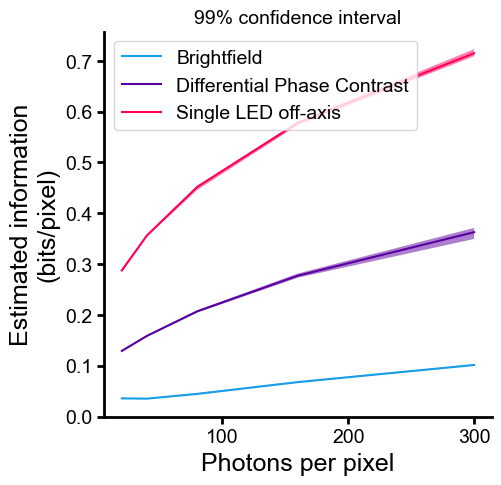

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(photons_per_pixel, mi_means_by_channel_photons['Brightfield'], label=get_display_channel_names('Brightfield'))
ax.fill_between(photons_per_pixel, mi_confidences_by_channel_photons['Brightfield'][:, 0], mi_confidences_by_channel_photons['Brightfield'][:, 1], alpha=0.5)
ax.plot(photons_per_pixel, mi_means_by_channel_photons['DPC_Right'], label=get_display_channel_names('DPC_Right'))
ax.fill_between(photons_per_pixel, mi_confidences_by_channel_photons['DPC_Right'][:, 0], mi_confidences_by_channel_photons['DPC_Right'][:, 1], alpha=0.5)
ax.plot(photons_per_pixel, mi_means_by_channel_photons['LED119'], label=get_display_channel_names('LED119'))
ax.fill_between(photons_per_pixel, mi_confidences_by_channel_photons['LED119'][:, 0], mi_confidences_by_channel_photons['LED119'][:, 1], alpha=0.5)
ax.set(xlabel='Photons per pixel', ylabel='Estimated information\n(bits/pixel)')
ax.legend()
clear_spines(ax)
ax.title.set_text(f'{confidence_interval}% confidence interval')


In [18]:
get_display_channel_names(channel_names)

['Brightfield', 'Differential Phase Contrast', 'Single LED off-axis']